In [ ]:
!pip install mne

In [ ]:
import numpy as np
import scipy.io
import os
from mne.io import read_raw_gdf
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, filtfilt

## Channel Number Verification
i'm not sure whether we talked about that the total channel number is actually 67 or i just forgot and got it wrong.

the number of channel in the gdf file is 68 according to the result

if it's really 67 you can modify the .mat data in later code block

In [ ]:
# Read the gdf file
file_path = "/content/gdf_210_010/Subject_210_FES_Online__feedback_n_s001_r001_2025_04_03_160329.gdf"
raw_data = read_raw_gdf(file_path, preload=True)

# Get the number of channels
num_channels = len(raw_data.ch_names)
print(f"Number of channels: {num_channels}")

Extracting EDF parameters from /content/gdf_210_010/Subject_210_FES_Online__feedback_n_s001_r001_2025_04_03_160329.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
FP1, FPZ, FP2, F7, F3, FZ, F4, F8, FC5, FC1, FC2, FC6, M1, T7, C3, CZ, C4, T8, M2, CP5, CP1, CP2, CP6, P7, P3, PZ, P4, P8, POZ, O1, O2, EOG, AF7, AF3, AF4, AF8, F5, F1, F2, F6, FC3, FCZ, FC4, C5, C1, C2, C6, CP3, CP4, P5, P1, P2, P6, PO5, PO3, PO4, PO6, FT7, FT8, TP7, TP8, PO7, PO8, OZ, sens1, sens2, sens3
Creating raw.info structure...
Reading 0 ... 194047  =      0.000 ...   378.998 secs...
Number of channels: 68


## Utils for File Format Convert
gdf -> mat

In [ ]:
def process_and_save_gdf_files(input_folder, output_folder, event_mapping):
    """
    Process all .gdf files in the specified folder and save them as .mat files.

    :param input_folder: Folder path containing .gdf files
    :param output_folder: Folder path for saving .mat files
    :param event_mapping: Mapping of event annotations
    """
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate through all .gdf files in the folder
    for file_name in os.listdir(input_folder):
        if file_name.endswith('.gdf'):
            file_path = os.path.join(input_folder, file_name)
            raw_data = read_raw_gdf(file_path, preload=True)

            # Extract EEG data and related information
            eeg_data = raw_data.get_data()  # Channel data
            sampling_rate = raw_data.info['sfreq']  # Sampling rate
            annotations = raw_data.annotations  # Event annotations

            # Extract event annotations and map to structured data
            event_positions = []
            for annot in annotations:
                if annot['description'] in event_mapping:
                    event_positions.append({
                        'event': annot['description'],
                        'description': event_mapping[annot['description']],
                        'pos': annot['onset']
                    })

            # Prepare complete data for saving to .mat file
            mat_data = {
                'eeg_data': eeg_data,  # EEG signals
                'sampling_rate': sampling_rate,  # Sampling rate
                'event_positions': event_positions  # Event annotation information
            }

            # Save the .mat file
            output_path = os.path.join(output_folder, file_name.replace('.gdf', '.mat'))
            scipy.io.savemat(output_path, mat_data)

            print(f"Data saved to {output_path}")

# Example usage
event_mapping = {
    '32766': 'start of the recording',
    '1000': 'start of the trial',
    '768': 'start of the fixation cross',
    '769': 'cue start',
    '7691': 'rest trial start',
    '7701': 'move trial start',
    '7692': 'rest trial miss/timeout',
    '7702': 'move trial miss/timeout',
    '7693': 'rest trial hit',
    '7703': 'move trial hit'
}

## File Format Convert -- 210

In [ ]:
input_folder = '/content/gdf_210_010'
output_folder = '/content/mat_210_010'

process_and_save_gdf_files(input_folder, output_folder, event_mapping)

Extracting EDF parameters from /content/gdf_210_010/Subject_210_FES_Online__feedback_n_s001_r004_2025_04_03_162806.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
FP1, FPZ, FP2, F7, F3, FZ, F4, F8, FC5, FC1, FC2, FC6, M1, T7, C3, CZ, C4, T8, M2, CP5, CP1, CP2, CP6, P7, P3, PZ, P4, P8, POZ, O1, O2, EOG, AF7, AF3, AF4, AF8, F5, F1, F2, F6, FC3, FCZ, FC4, C5, C1, C2, C6, CP3, CP4, P5, P1, P2, P6, PO5, PO3, PO4, PO6, FT7, FT8, TP7, TP8, PO7, PO8, OZ, sens1, sens2, sens3
Creating raw.info structure...
Reading 0 ... 191487  =      0.000 ...   373.998 secs...
Data saved to /content/mat_210_010/Subject_210_FES_Online__feedback_n_s001_r004_2025_04_03_162806.mat
Extracting EDF parameters from /content/gdf_210_010/Subject_210_FES_Online__feedback_n_s001_r002_2025_04_03_161216.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will

In [ ]:
input_folder = '/content/gdf_210_021'
output_folder = '/content/mat_210_021'

process_and_save_gdf_files(input_folder, output_folder, event_mapping)

Extracting EDF parameters from /content/gdf_210_021/Subject_210_FES_Online__feedback_n_s002_r001_2025_04_04_100052.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
FP1, FPZ, FP2, F7, F3, FZ, F4, F8, FC5, FC1, FC2, FC6, M1, T7, C3, CZ, C4, T8, M2, CP5, CP1, CP2, CP6, P7, P3, PZ, P4, P8, POZ, O1, O2, EOG, AF7, AF3, AF4, AF8, F5, F1, F2, F6, FC3, FCZ, FC4, C5, C1, C2, C6, CP3, CP4, P5, P1, P2, P6, PO5, PO3, PO4, PO6, FT7, FT8, TP7, TP8, PO7, PO8, OZ, sens1, sens2, sens3
Creating raw.info structure...
Reading 0 ... 195583  =      0.000 ...   381.998 secs...
Data saved to /content/mat_210_021/Subject_210_FES_Online__feedback_n_s002_r001_2025_04_04_100052.mat
Extracting EDF parameters from /content/gdf_210_021/Subject_210_FES_Online__feedback_n_s002_r002_2025_04_04_101132.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will

In [ ]:
input_folder = '/content/gdf_210_022'
output_folder = '/content/mat_210_022'

process_and_save_gdf_files(input_folder, output_folder, event_mapping)

Extracting EDF parameters from /content/gdf_210_022/Subject_210_FES_Online__feedback_n_s002_r006_2025_04_04_111729.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
FP1, FPZ, FP2, F7, F3, FZ, F4, F8, FC5, FC1, FC2, FC6, M1, T7, C3, CZ, C4, T8, M2, CP5, CP1, CP2, CP6, P7, P3, PZ, P4, P8, POZ, O1, O2, EOG, AF7, AF3, AF4, AF8, F5, F1, F2, F6, FC3, FCZ, FC4, C5, C1, C2, C6, CP3, CP4, P5, P1, P2, P6, PO5, PO3, PO4, PO6, FT7, FT8, TP7, TP8, PO7, PO8, OZ, sens1, sens2, sens3
Creating raw.info structure...
Reading 0 ... 190975  =      0.000 ...   372.998 secs...
Data saved to /content/mat_210_022/Subject_210_FES_Online__feedback_n_s002_r006_2025_04_04_111729.mat
Extracting EDF parameters from /content/gdf_210_022/Subject_210_FES_Online__feedback_n_s002_r004_2025_04_04_110250.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will

## File Format Convert -- 204

In [ ]:
input_folder = '/content/gdf_204_010'
output_folder = '/content/mat_204_010'

process_and_save_gdf_files(input_folder, output_folder, event_mapping)

Extracting EDF parameters from /content/gdf_204_010/Subject_204_FES_Online__feedback_n_s001_r002_2025_03_20_120715.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
FP1, FPZ, FP2, F7, F3, FZ, F4, F8, FC5, FC1, FC2, FC6, M1, T7, C3, CZ, C4, T8, M2, CP5, CP1, CP2, CP6, P7, P3, PZ, P4, P8, POZ, O1, O2, EOG, AF7, AF3, AF4, AF8, F5, F1, F2, F6, FC3, FCZ, FC4, C5, C1, C2, C6, CP3, CP4, P5, P1, P2, P6, PO5, PO3, PO4, PO6, FT7, FT8, TP7, TP8, PO7, PO8, OZ, sens1, sens2, sens3
Creating raw.info structure...
Reading 0 ... 193535  =      0.000 ...   377.998 secs...
Data saved to /content/mat_204_010/Subject_204_FES_Online__feedback_n_s001_r002_2025_03_20_120715.mat
Extracting EDF parameters from /content/gdf_204_010/Subject_204_FES_Online__feedback_n_s001_r001_2025_03_20_115753.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will

In [ ]:
input_folder = '/content/gdf_204_021'
output_folder = '/content/mat_204_021'

process_and_save_gdf_files(input_folder, output_folder, event_mapping)

Extracting EDF parameters from /content/gdf_204_021/Subject_204_FES_Online__feedback_n_s002_r003_2025_03_21_095235.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
FP1, FPZ, FP2, F7, F3, FZ, F4, F8, FC5, FC1, FC2, FC6, M1, T7, C3, CZ, C4, T8, M2, CP5, CP1, CP2, CP6, P7, P3, PZ, P4, P8, POZ, O1, O2, EOG, AF7, AF3, AF4, AF8, F5, F1, F2, F6, FC3, FCZ, FC4, C5, C1, C2, C6, CP3, CP4, P5, P1, P2, P6, PO5, PO3, PO4, PO6, FT7, FT8, TP7, TP8, PO7, PO8, OZ, sens1, sens2, sens3
Creating raw.info structure...
Reading 0 ... 194559  =      0.000 ...   379.998 secs...
Data saved to /content/mat_204_021/Subject_204_FES_Online__feedback_n_s002_r003_2025_03_21_095235.mat
Extracting EDF parameters from /content/gdf_204_021/Subject_204_FES_Online__feedback_n_s002_r001_2025_03_21_093700.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will

In [ ]:
input_folder = '/content/gdf_204_022'
output_folder = '/content/mat_204_022'

process_and_save_gdf_files(input_folder, output_folder, event_mapping)

Extracting EDF parameters from /content/gdf_204_022/Subject_204_FES_Online__feedback_n_s002_r006_2025_03_21_110548.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
FP1, FPZ, FP2, F7, F3, FZ, F4, F8, FC5, FC1, FC2, FC6, M1, T7, C3, CZ, C4, T8, M2, CP5, CP1, CP2, CP6, P7, P3, PZ, P4, P8, POZ, O1, O2, EOG, AF7, AF3, AF4, AF8, F5, F1, F2, F6, FC3, FCZ, FC4, C5, C1, C2, C6, CP3, CP4, P5, P1, P2, P6, PO5, PO3, PO4, PO6, FT7, FT8, TP7, TP8, PO7, PO8, OZ, sens1, sens2, sens3
Creating raw.info structure...
Reading 0 ... 195071  =      0.000 ...   380.998 secs...
Data saved to /content/mat_204_022/Subject_204_FES_Online__feedback_n_s002_r006_2025_03_21_110548.mat
Extracting EDF parameters from /content/gdf_204_022/Subject_204_FES_Online__feedback_n_s002_r005_2025_03_21_105838.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will

## Utils for EEG Data Filtering

In [ ]:
# Filter and preprocess the EEG data
lowcut = 0.5  # Low-frequency boundary (Hz)
highcut = 45  # High-frequency boundary (Hz)
amp_limit = 100 * 1e-6  # Amplitude limit (-100 μV to 100 μV)

# Define the frequency range filter
def bandpass_filter(data, lowcut, highcut, sampling_rate):
    nyquist = 0.5 * sampling_rate
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(4, [low, high], btype='band')
    return filtfilt(b, a, data, axis=-1)

def preprocess_eeg_data(eeg_data, lowcut, highcut, sampling_rate, amp_limit):
    # Apply bandpass filtering to the data
    eeg_filtered = bandpass_filter(eeg_data, lowcut, highcut, sampling_rate)

    # Limit the amplitude range
    eeg_clipped = np.clip(eeg_filtered, -amp_limit, amp_limit)

    # Find all channels where the data is entirely zero and their indices
    zero_channels = np.where(np.all(eeg_clipped == 0, axis=1))[0]  # Find indices of channels entirely zero
    print(f"Number of channels entirely zero: {len(zero_channels)}")
    print(f"Indices of channels entirely zero: {zero_channels}")
    return eeg_clipped

## Grand Average for Each Session
because there is abnormal data in 210 day1 session

i list all file having wrong data

there is clealy a abnormal one much shorter than the regular shape which approximately is 3600

Number of channels entirely zero: 1
Indices of channels entirely zero: [67]

Computing and Plotting Rest Average EEG...
Segment shape: (68, 3615)
Segment shape: (68, 3586)
Segment shape: (68, 3607)
Segment shape: (68, 3608)
Segment shape: (68, 3601)
Segment shape: (68, 3602)
Segment shape: (68, 3587)
Segment shape: (68, 3605)
Segment shape: (68, 3610)
Segment shape: (68, 3596)


<ipython-input-109-bd192b287a47>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_sample = int(start_event['pos'][0][0] * sampling_rate)
<ipython-input-109-bd192b287a47>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)


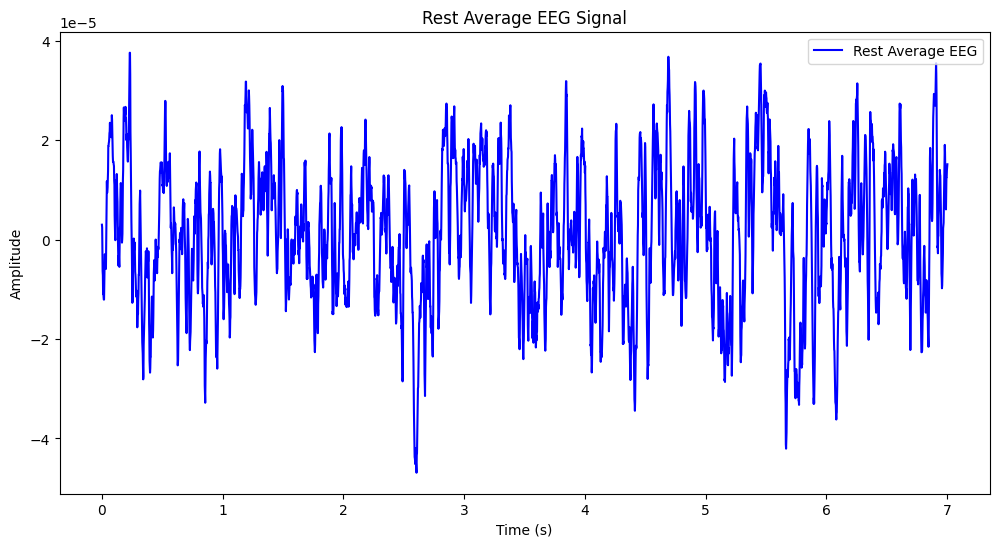


Computing and Plotting Move Average EEG...
Segment shape: (68, 3616)
Segment shape: (68, 3590)
Segment shape: (68, 3614)
Segment shape: (68, 3607)
Segment shape: (68, 496)
Segment shape: (68, 3593)
Segment shape: (68, 3604)
Segment shape: (68, 3597)
Segment shape: (68, 3593)
Segment shape: (68, 3600)


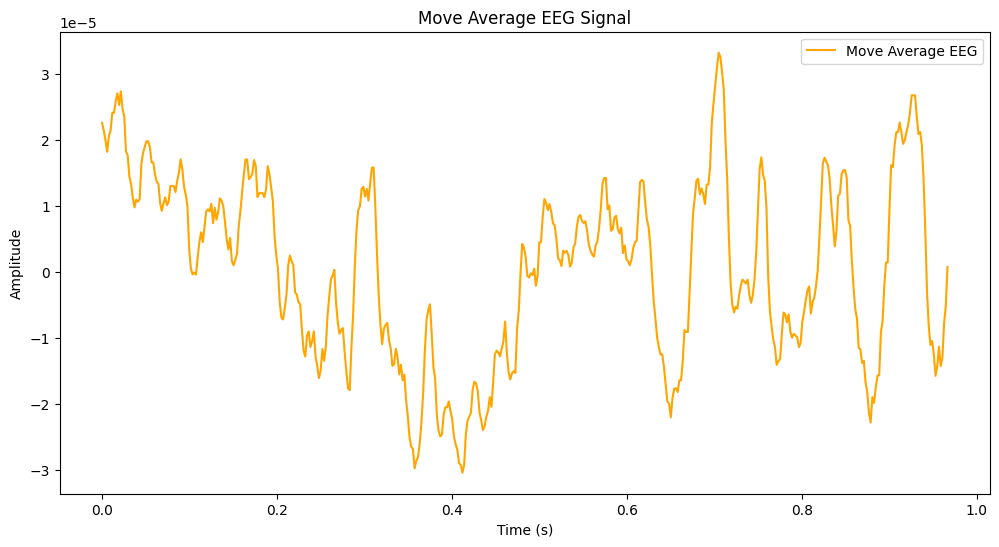

In [ ]:
# Compute and plot the average of all segments
def compute_and_plot_average_eeg(start_events, end_events, title, color):
    all_segments = []  # For storing all event segments

    for start_event in event_positions:
        if start_event['event'][0] in start_events:
            start_sample = int(start_event['pos'][0][0] * sampling_rate)

            # Find the corresponding end event
            for end_event in event_positions:
                if end_event['event'][0] in end_events and end_event['pos'][0][0] > start_event['pos'][0][0]:
                    end_sample = int(end_event['pos'][0][0] * sampling_rate)
                    # if end_sample - start_sample < 3000:
                      # break

                    # Extract the signal segment
                    eeg_segment = eeg_data_filtered[:, start_sample:end_sample]
                    print(f"Segment shape: {eeg_segment.shape}")
                    mean_eeg_segment = np.mean(eeg_segment, axis=0)  # Compute the average of each segment
                    all_segments.append(mean_eeg_segment)
                    break

    if all_segments:
        min_length = min(segment.shape[0] for segment in all_segments)

        # Truncate all segments to the shortest length
        truncated_segments = [segment[:min_length] for segment in all_segments]

        # Compute the global average
        global_mean_eeg = np.mean(truncated_segments, axis=0)

        # Plot the global average
        plt.figure(figsize=(12, 6))
        plt.plot(
            np.arange(len(global_mean_eeg)) / sampling_rate,
            global_mean_eeg,
            label=f"{title} Average EEG",
            color=color
        )
        plt.title(f"{title} Average EEG Signal")
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.legend(loc='upper right')
        plt.show()

# Load the .mat file
mat_file_path = '/content/mat_210_010/Subject_210_FES_Online__feedback_n_s001_r004_2025_04_03_162806.mat'
'''
/content/mat_210_010/Subject_210_FES_Online__feedback_n_s001_r004_2025_04_03_162806.mat
/content/mat_210_022/Subject_210_FES_Online__feedback_n_s002_r005_2025_04_04_111022.mat
/content/mat_210_022/Subject_210_FES_Online__feedback_n_s002_r006_2025_04_04_111729.mat
'''
mat_data = scipy.io.loadmat(mat_file_path)

# Extract events and EEG data
event_positions = mat_data['event_positions'][0]
eeg_data = mat_data['eeg_data']
# eeg_data = mat_data['eeg_data'][:67]
sampling_rate = mat_data['sampling_rate'][0][0]

eeg_data_filtered = preprocess_eeg_data(eeg_data, lowcut, highcut, sampling_rate, amp_limit)

# Define event types
rest_starts = ['7691']
move_starts = ['7701']
rest_ends = ['7692', '7693']
move_ends = ['7702', '7703']

# Plot the averages for "Rest" and "Move" segments
print("\nComputing and Plotting Rest Average EEG...")
compute_and_plot_average_eeg(rest_starts, rest_ends, "Rest", color='blue')

print("\nComputing and Plotting Move Average EEG...")
compute_and_plot_average_eeg(move_starts, move_ends, "Move", color='orange')


In [ ]:
import scipy.io
import os

# Get the current working directory
current_directory = os.getcwd()
print(f"Current working directory: {current_directory}")

# Print the files in the current working directory
print(f"Files in the current directory: {os.listdir(current_directory)}")

# Attempt loading with different mat_dtype settings
try:
    # Load the .mat file with mat_dtype=False
    proj_210 = scipy.io.loadmat('/content/proj_subj_210.mat', mat_dtype=False)
    print("Successfully loaded the .mat file with mat_dtype=False")
except OSError:
    # Load the .mat file with mat_dtype=True
    try:
        proj_210 = scipy.io.loadmat('/content/proj_subj_210.mat', mat_dtype=True)
        print("Successfully loaded the .mat file with mat_dtype=True")
    except OSError:
        print("Failed to load the .mat file even with different mat_dtype settings.")


Current working directory: /content
Files in the current directory: ['.config', 'proj_subj_204.mat', 'proj_subj_210.mat', 'sample_data']
Successfully loaded the .mat file with mat_dtype=False


In [ ]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

# 访问 proj_subj_210 结构体
proj_subj_210 = proj_210['proj_subj_210'].item()

# 提取元组中的唯一元素
data_extracted = proj_subj_210[0]  # 访问第一个元素
# print(type(data_extracted))  # 确认数据类型
# print(data_extracted.dtype)  # 查看结构信息（如果是结构化数组）
runs = data_extracted['run'].item()  # 提取 run 结构
run4 = runs[0, 3]  # 访问第四个 run（索引 3）

# print(type(run4['header']))  # 查看数据类型
# print(run4['header'])  # 直接查看内容（如果输出太长，可以限制）

header_data = run4['header'].item()  # 提取实际内容
# 访问触发事件数据
triggers = header_data[1].item()  # 提取触发事件结构
event_types = triggers[0].squeeze()  # 去掉多余的维度
event_positions = triggers[1].squeeze()  # 同样处理 POS 数据

print(np.unique(event_types))  # 查看所有独特的事件类型
print(event_positions[:10])  # 查看前 10 个时间点

[   0 1000 7691 7692 7701 7702]
[15150 15410 17314 18349 19816 23431 24466 26014 27045 28458]


In [ ]:
# 定义事件类型
rest_start = 7691
rest_end = 7692  # 休息结束
move_start = 7701
move_end = 7702  # 移动结束

# 找到 `rest` 和 `move` trials 的索引
rest_start_idx = np.where(event_types == rest_start)[0]
rest_end_idx = np.where(event_types == rest_end)[0]
move_start_idx = np.where(event_types == move_start)[0]
move_end_idx = np.where(event_types == move_end)[0]

for start, end in zip(move_start_idx, move_end_idx):
    print(f'Move: {event_positions[end] - event_positions[start]}')

'''
Computing and Plotting Move Average EEG...
Segment shape: (68, 3616)
Segment shape: (68, 3590)
Segment shape: (68, 3614)
Segment shape: (68, 3607)
Segment shape: (68, 496)
Segment shape: (68, 3593)
Segment shape: (68, 3604)
Segment shape: (68, 3597)
Segment shape: (68, 3593)
Segment shape: (68, 3600)
'''


Move: 3616
Move: 3589
Move: 3613
Move: 3607
Move: 496
Move: 3594
Move: 3605
Move: 3596
Move: 3593
Move: 3600


'\nComputing and Plotting Move Average EEG...\nSegment shape: (68, 3616)\nSegment shape: (68, 3590)\nSegment shape: (68, 3614)\nSegment shape: (68, 3607)\nSegment shape: (68, 496)\nSegment shape: (68, 3593)\nSegment shape: (68, 3604)\nSegment shape: (68, 3597)\nSegment shape: (68, 3593)\nSegment shape: (68, 3600)\n'

## Utils for Final Grand Average
i choose to ignore the abnormal data here for the total number is only 3 trial

if that's not appropriate you can edit in this section


```
if end_sample - start_sample < 3000:
    break
```

and if the channel number is 67 you can use


```
eeg_data = mat_data['eeg_data'][:67]
# if the channel number is 67 you can use this instead
```

ps: i gusse you need the actual grand average data so i didn't run the 67 channel graph, sorry if i was wrong


In [ ]:
# Compute and plot grand average
def compute_and_plot_grand_average(mat_folder, rest_starts, move_starts, rest_ends, move_ends, lowcut, highcut, amp_limit, title):
    all_rest_segments = []
    all_move_segments = []

    # Iterate through .mat files in the folder
    for file_name in os.listdir(mat_folder):
        if file_name.endswith('.mat'):
            file_path = os.path.join(mat_folder, file_name)
            mat_data = scipy.io.loadmat(file_path)

            # Extract EEG data and event information
            eeg_data = mat_data['eeg_data']

            # eeg_data = mat_data['eeg_data'][:67]
            # if the channel number is 67 you can use this instead

            sampling_rate = mat_data['sampling_rate'][0][0]
            event_positions = mat_data['event_positions'][0]

            # Preprocess EEG data
            eeg_data_filtered = preprocess_eeg_data(eeg_data, lowcut, highcut, sampling_rate, amp_limit)

            # Extract rest and move EEG segments
            for start_event in event_positions:
                start_sample = int(start_event['pos'][0][0] * sampling_rate)
                if start_event['event'][0] in rest_starts:
                    for end_event in event_positions:
                        if end_event['event'][0] in rest_ends and end_event['pos'][0][0] > start_event['pos'][0][0]:
                            end_sample = int(end_event['pos'][0][0] * sampling_rate)
                            if end_sample - start_sample < 3000:
                              break
                              # ignore the abnormal data

                            segment = np.mean(eeg_data_filtered[:, start_sample:end_sample], axis=0)
                            all_rest_segments.append(segment)
                            break
                elif start_event['event'][0] in move_starts:
                    for end_event in event_positions:
                        if end_event['event'][0] in move_ends and end_event['pos'][0][0] > start_event['pos'][0][0]:
                            end_sample = int(end_event['pos'][0][0] * sampling_rate)
                            if end_sample - start_sample < 3000:
                              continue
                            segment = np.mean(eeg_data_filtered[:, start_sample:end_sample], axis=0)
                            all_move_segments.append(segment)
                            break

    # Compute and plot grand average
    def plot_segments(segments, title, color):
        if segments:
            min_length = min(seg.shape[0] for seg in segments)
            truncated_segments = [seg[:min_length] for seg in segments]
            grand_average = np.mean(truncated_segments, axis=0)

            plt.figure(figsize=(12, 6))
            plt.plot(np.arange(len(grand_average)) / sampling_rate, grand_average, label=title, color=color)
            plt.title(f"{title} Grand Average EEG")
            plt.xlabel("Time (s)")
            plt.ylabel("Amplitude")
            plt.legend(loc='upper right')
            plt.grid()
            plt.show()
        else:
            print(f"No segments found for {title}.")

    # Plot grand average for Rest and Move
    plot_segments(all_rest_segments, title + ": Rest", 'blue')
    plot_segments(all_move_segments, title + ": Move", 'orange')

    # return all_rest_segments, all_move_segments

# Parameter settings
lowcut = 0.5  # Low-frequency boundary (Hz)
highcut = 45  # High-frequency boundary (Hz)
amp_limit = 100 * 1e-6  # Amplitude limit (-100 μV to 100 μV)
rest_starts = ['7691']
move_starts = ['7701']
rest_ends = ['7692', '7693']
move_ends = ['7702', '7703']


## Grand Average -- 210

Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


<ipython-input-89-1dfcd6ddf427>:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_sample = int(start_event['pos'][0][0] * sampling_rate)
<ipython-input-89-1dfcd6ddf427>:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)
<ipython-input-89-1dfcd6ddf427>:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)


Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


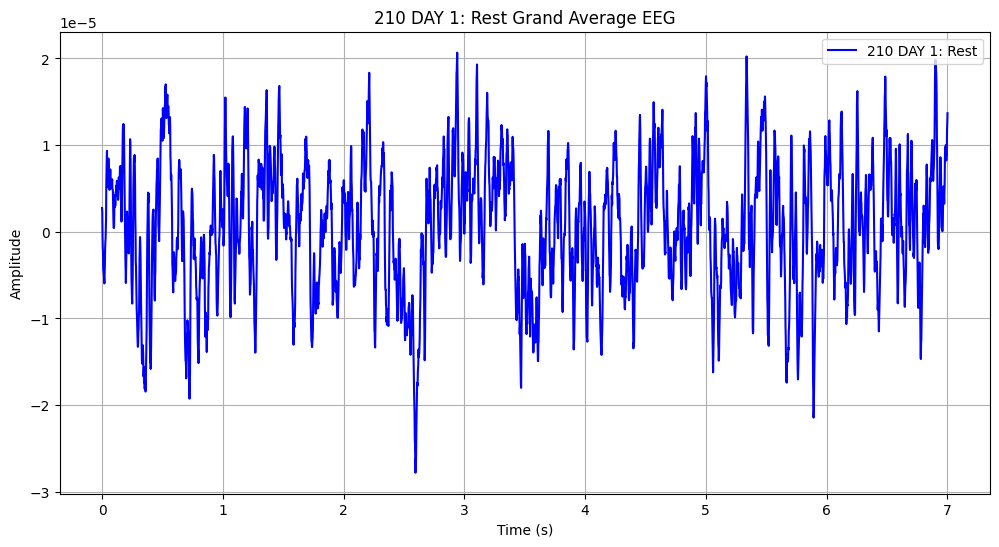

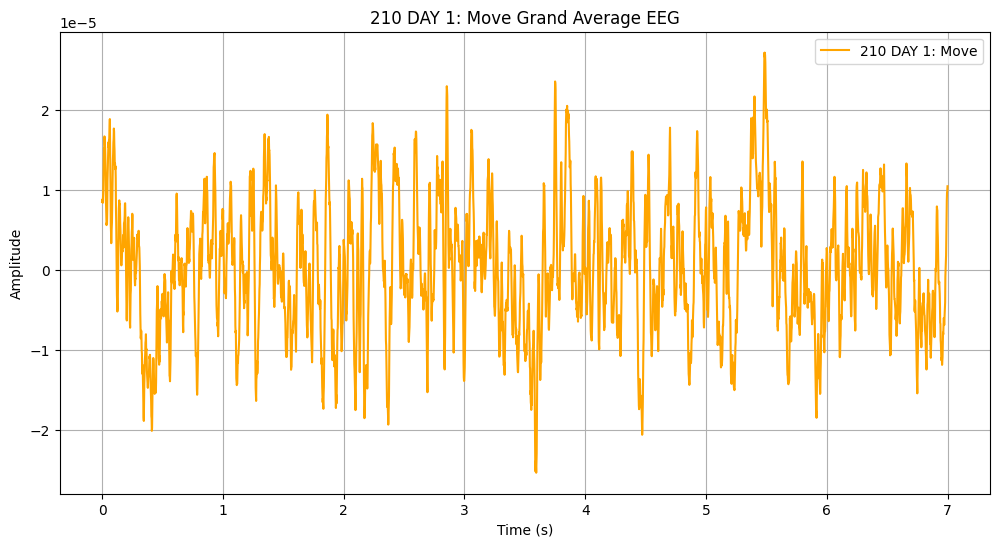

In [ ]:
mat_folder = '/content/mat_210_010'
compute_and_plot_grand_average(mat_folder, rest_starts, move_starts, rest_ends, move_ends, lowcut, highcut, amp_limit, '210 DAY 1')

Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


<ipython-input-88-cc9c6784dcda>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_sample = int(start_event['pos'][0][0] * sampling_rate)
<ipython-input-88-cc9c6784dcda>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)
<ipython-input-88-cc9c6784dcda>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)


Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


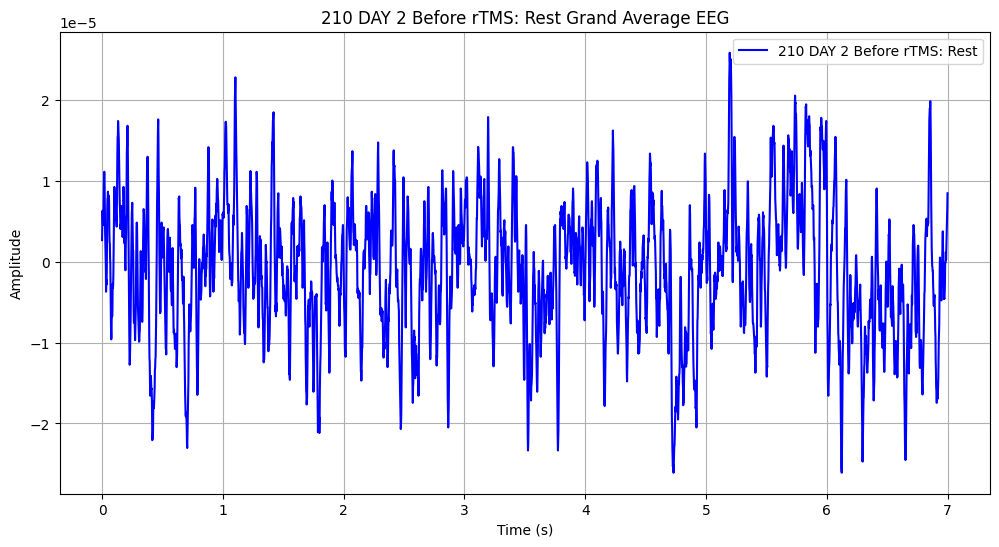

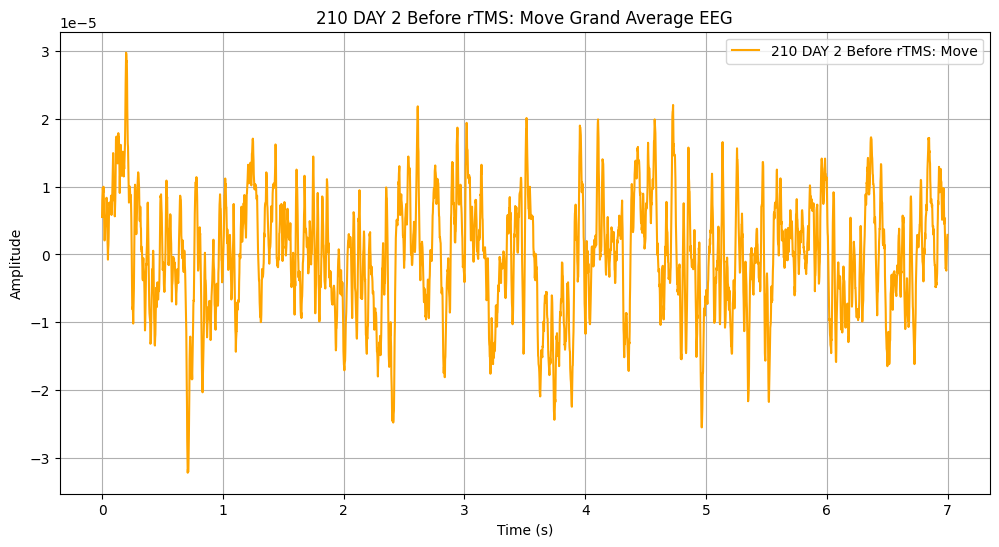

In [ ]:
mat_folder = '/content/mat_210_021'
compute_and_plot_grand_average(mat_folder, rest_starts, move_starts, rest_ends, move_ends, lowcut, highcut, amp_limit, '210 DAY 2 Before rTMS')

Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


<ipython-input-88-cc9c6784dcda>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_sample = int(start_event['pos'][0][0] * sampling_rate)
<ipython-input-88-cc9c6784dcda>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)
<ipython-input-88-cc9c6784dcda>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)


Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


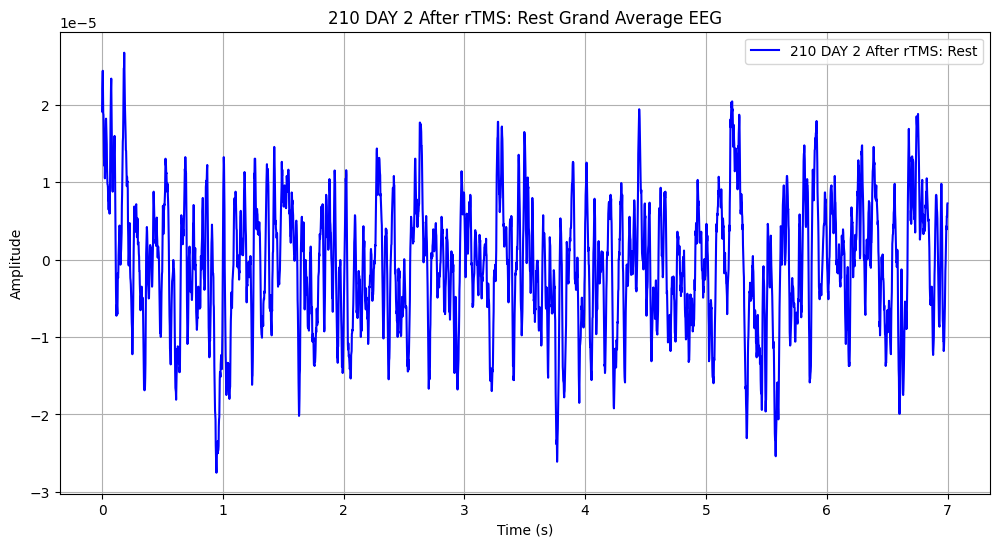

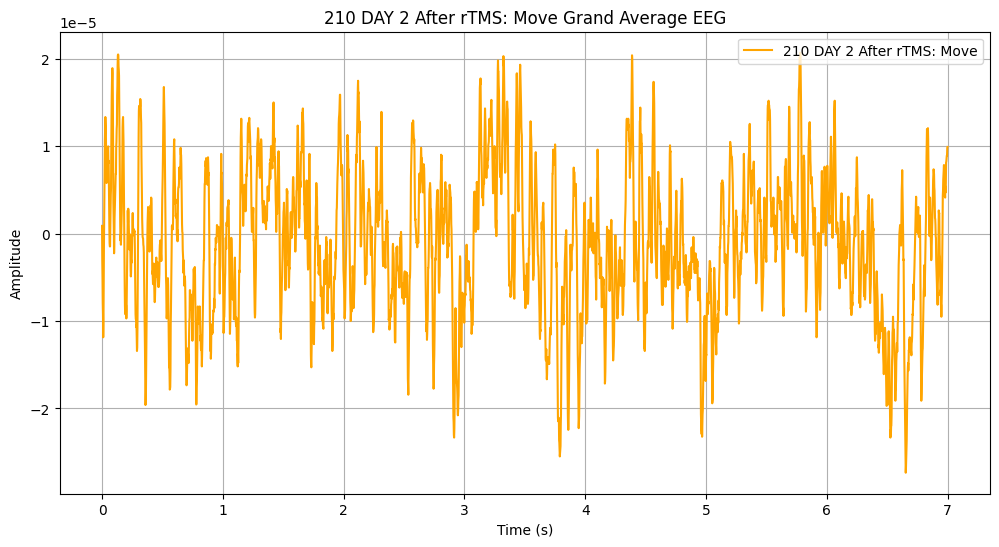

In [ ]:
mat_folder = '/content/mat_210_022'
compute_and_plot_grand_average(mat_folder, rest_starts, move_starts, rest_ends, move_ends, lowcut, highcut, amp_limit, '210 DAY 2 After rTMS')

## Grand Average -- 204

Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


<ipython-input-88-cc9c6784dcda>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_sample = int(start_event['pos'][0][0] * sampling_rate)
<ipython-input-88-cc9c6784dcda>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)
<ipython-input-88-cc9c6784dcda>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)


Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


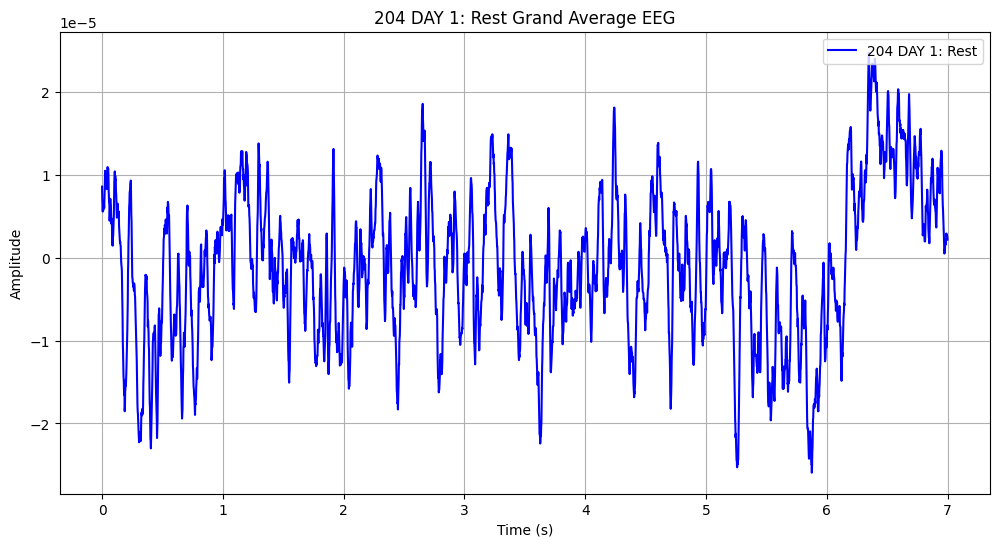

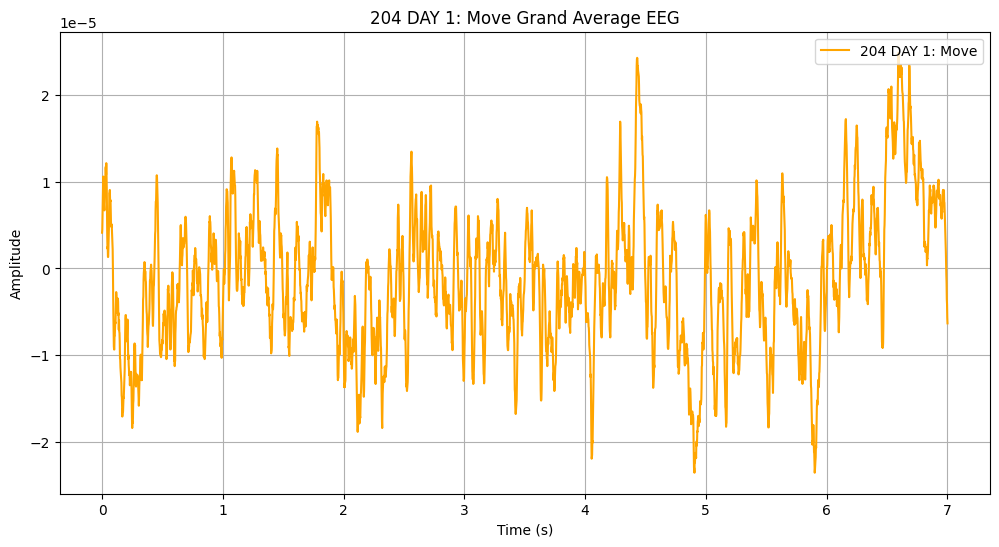

In [ ]:
mat_folder = '/content/mat_204_010'
compute_and_plot_grand_average(mat_folder, rest_starts, move_starts, rest_ends, move_ends, lowcut, highcut, amp_limit, '204 DAY 1')

Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


<ipython-input-88-cc9c6784dcda>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_sample = int(start_event['pos'][0][0] * sampling_rate)
<ipython-input-88-cc9c6784dcda>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)
<ipython-input-88-cc9c6784dcda>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)


Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


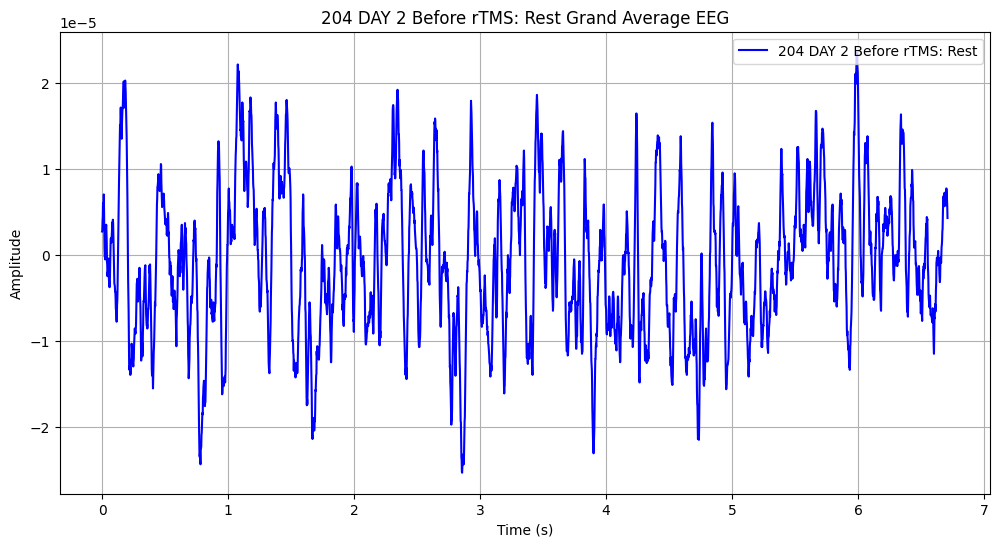

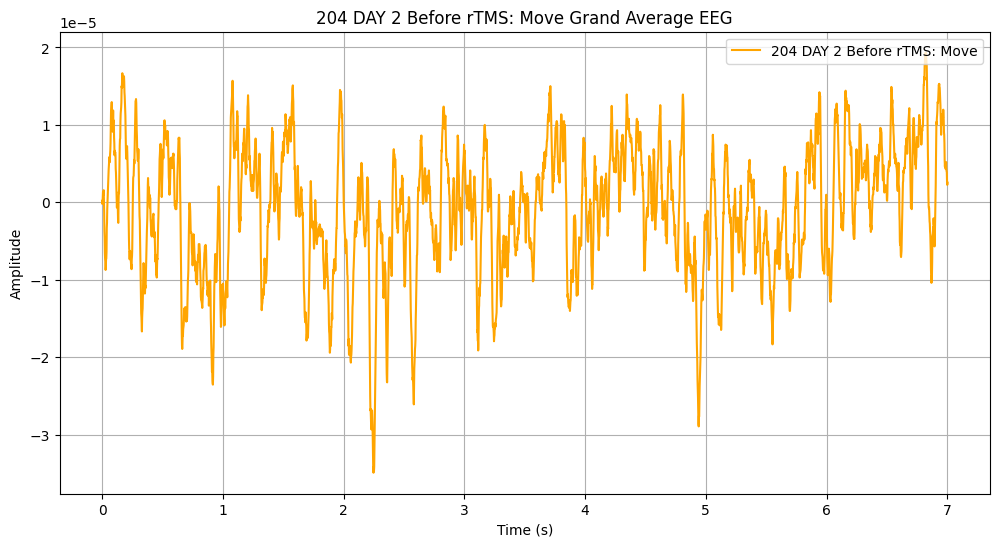

In [ ]:
mat_folder = '/content/mat_204_021'
compute_and_plot_grand_average(mat_folder, rest_starts, move_starts, rest_ends, move_ends, lowcut, highcut, amp_limit, '204 DAY 2 Before rTMS')

Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


<ipython-input-88-cc9c6784dcda>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_sample = int(start_event['pos'][0][0] * sampling_rate)
<ipython-input-88-cc9c6784dcda>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)
<ipython-input-88-cc9c6784dcda>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)


Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


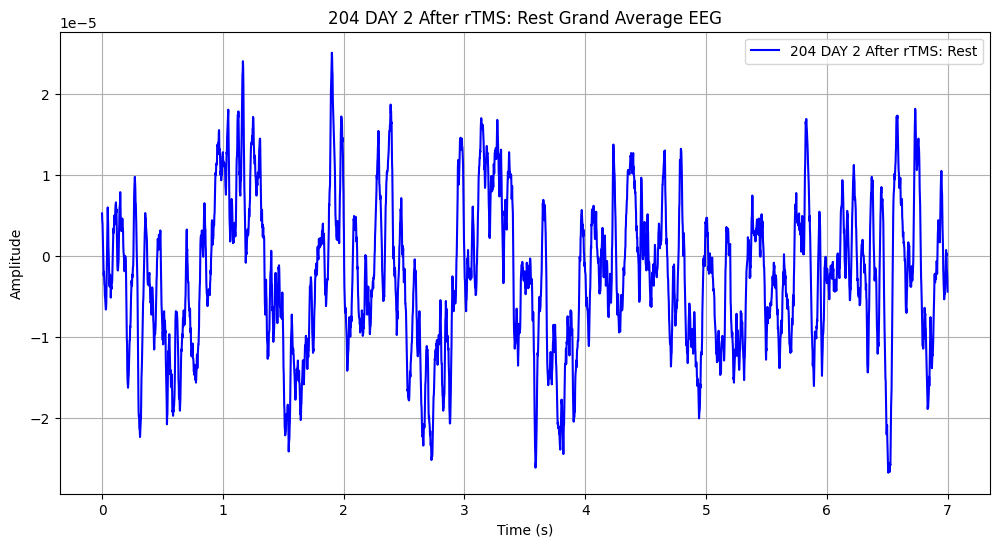

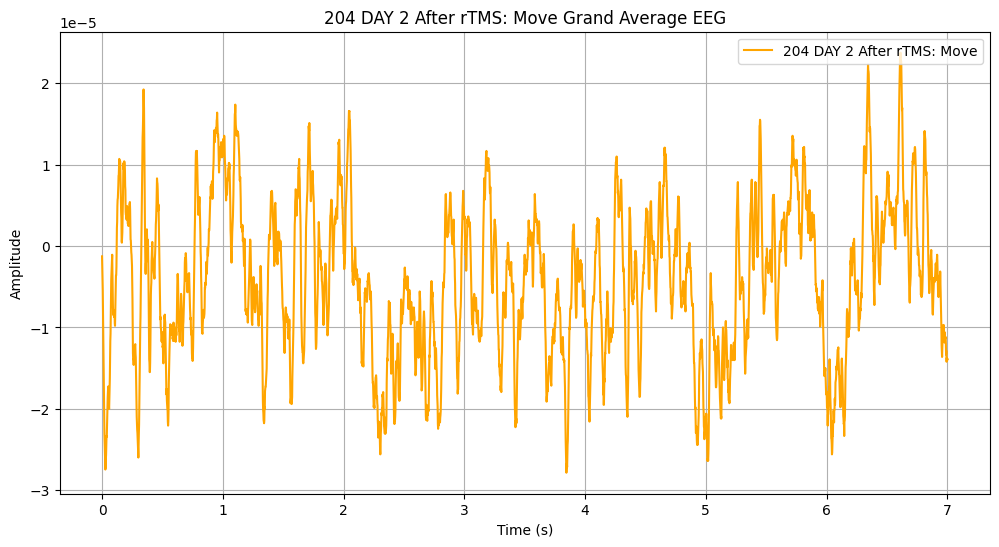

In [ ]:
mat_folder = '/content/mat_204_022'
compute_and_plot_grand_average(mat_folder, rest_starts, move_starts, rest_ends, move_ends, lowcut, highcut, amp_limit, '204 DAY 2 After rTMS')

## Utils for t-SNE

In [ ]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 27.4 MB/s eta 0:00:00


In [ ]:
from scipy.signal import resample, spectrogram
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import pywt

# Direct Resample
# Use resampling to unify segment length
def resample_segment(eeg_segment, target_length):
    """
    Resample eeg_segment (shape: [number of channels, original length]) to target_length
    """
    # axis=1 resamples along the time axis
    resampled_segment = resample(eeg_segment, target_length, axis=1)
    return resampled_segment

# Example: Directly extract the entire segment data as features (other statistics or time-frequency features can also be extracted based on this)
def extract_features_resample(eeg_segment, sampling_rate, target_length=3600):
    # Resample to a uniform length
    resampled = resample_segment(eeg_segment, target_length)
    # Flatten into a 1D vector as features; time-domain or frequency-domain features can also be further extracted
    features = resampled.flatten()
    return features

# Time-frequency
# Original time-frequency feature extraction (spectrogram mean features)
def extract_spectrogram_features(eeg_segment, sampling_rate):
    features = []
    for channel in eeg_segment:
        frequencies, times, Sxx = spectrogram(channel, fs=sampling_rate, nperseg=256)
        # Extract mean power of alpha wave (8-13 Hz) and beta wave (13-30 Hz)
        alpha_power = np.sum(Sxx[(frequencies >= 8) & (frequencies <= 13)], axis=0)
        beta_power = np.sum(Sxx[(frequencies >= 13) & (frequencies <= 30)], axis=0)
        features.extend([alpha_power.mean(), beta_power.mean()])
    return np.array(features)

# Extract multi-scale energy features using wavelet transform
def extract_wavelet_features(eeg_segment, wavelet='db4', level=4):
    features = []
    for channel in eeg_segment:
        coeffs = pywt.wavedec(channel, wavelet, level=level)
        # For simplicity, calculate the energy of coefficients at each level
        channel_features = [np.sum(np.square(c)) for c in coeffs]
        features.extend(channel_features)
    return np.array(features)

# Comprehensive time-frequency feature extraction (multiple methods can be combined)
def extract_time_frequency_features(eeg_segment, sampling_rate):
    spec_feat = extract_spectrogram_features(eeg_segment, sampling_rate)
    wavelet_feat = extract_wavelet_features(eeg_segment)
    # Different feature extraction methods can be directly concatenated
    combined_features = np.concatenate([spec_feat, wavelet_feat])
    return combined_features

In [ ]:
function_name = ["Direct Resampling", "Combined Time-Frequency Features"]

# Traverse EEG data files and extract features
def process_eeg_data(mat_folder, rest_starts, move_starts, rest_ends, move_ends, lowcut, highcut, amp_limit, title):
    feature_extraction_methods = {
        "Combined Time-Frequency Features": extract_time_frequency_features,
        "Direct Resampling": extract_features_resample
    }

    all_rest_features = []
    all_move_features = []

    for file_name in os.listdir(mat_folder):
        if file_name.endswith('.mat'):
            file_path = os.path.join(mat_folder, file_name)
            mat_data = scipy.io.loadmat(file_path)

            # Assume EEG data shape is [number of channels, number of time points]
            eeg_data = mat_data['eeg_data']
            sampling_rate = mat_data['sampling_rate'][0][0]
            event_positions = mat_data['event_positions'][0]

            eeg_data_filtered = preprocess_eeg_data(eeg_data, lowcut, highcut, sampling_rate, amp_limit)

            for start_event in event_positions:
                start_sample = int(start_event['pos'][0][0] * sampling_rate)
                if start_event['event'][0] in rest_starts:
                    for end_event in event_positions:
                        if end_event['event'][0] in rest_ends and end_event['pos'][0][0] > start_event['pos'][0][0]:
                            end_sample = int(end_event['pos'][0][0] * sampling_rate)
                            if end_sample - start_sample < 3000:
                                break
                            selected_function = feature_extraction_methods[title]
                            features = selected_function(
                                eeg_data_filtered[:, start_sample:end_sample],
                                sampling_rate
                            )
                            all_rest_features.append(features)
                            break
                elif start_event['event'][0] in move_starts:
                    for end_event in event_positions:
                        if end_event['event'][0] in move_ends and end_event['pos'][0][0] > start_event['pos'][0][0]:
                            end_sample = int(end_event['pos'][0][0] * sampling_rate)
                            if end_sample - start_sample < 3000:
                                continue
                            selected_function = feature_extraction_methods[title]
                            features = selected_function(
                                eeg_data_filtered[:, start_sample:end_sample],
                                sampling_rate
                            )
                            all_move_features.append(features)
                            break
    return all_rest_features, all_move_features

# Perform t-SNE on features and plot the results
def perform_tsne_and_plot(all_rest_features, all_move_features, title, function_title):
    # Combine all features
    all_segments = np.concatenate([all_rest_features, all_move_features], axis=0)

    # Normalize the data (normalization is crucial for t-SNE)
    scaler = StandardScaler()
    all_segments_norm = scaler.fit_transform(all_segments)

    # Create labels: 0 indicates rest, 1 indicates move
    rest_labels = np.zeros(len(all_rest_features))
    move_labels = np.ones(len(all_move_features))
    labels = np.concatenate([rest_labels, move_labels], axis=0)

    # Dimensionality reduction with t-SNE
    tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
    tsne_result = tsne.fit_transform(all_segments_norm)

    # Visualization
    plt.figure(figsize=(10, 8))
    plt.scatter(tsne_result[labels == 0, 0], tsne_result[labels == 0, 1], c='blue', label='Rest', alpha=0.7)
    plt.scatter(tsne_result[labels == 1, 0], tsne_result[labels == 1, 1], c='orange', label='Move', alpha=0.7)
    plt.title(f"{title}: t-SNE Visualization ({function_title})")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.legend()
    plt.grid(True)
    plt.show()

## t-SNE -- 210

Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


<ipython-input-123-a5b91d96baf1>:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_sample = int(start_event['pos'][0][0] * sampling_rate)
<ipython-input-123-a5b91d96baf1>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)
<ipython-input-123-a5b91d96baf1>:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)


Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


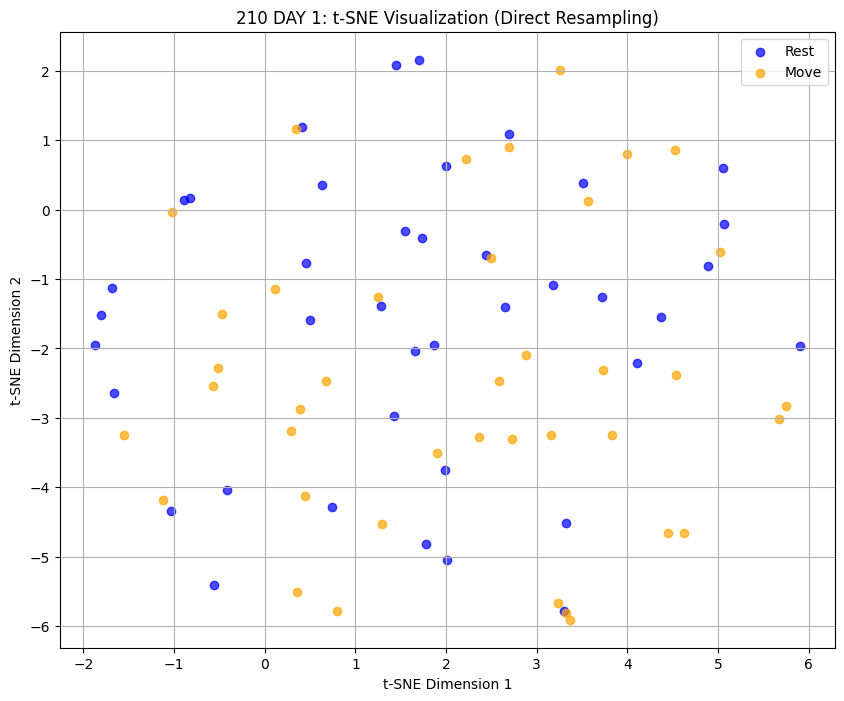

Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


<ipython-input-123-a5b91d96baf1>:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_sample = int(start_event['pos'][0][0] * sampling_rate)
<ipython-input-123-a5b91d96baf1>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)
<ipython-input-123-a5b91d96baf1>:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)


Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


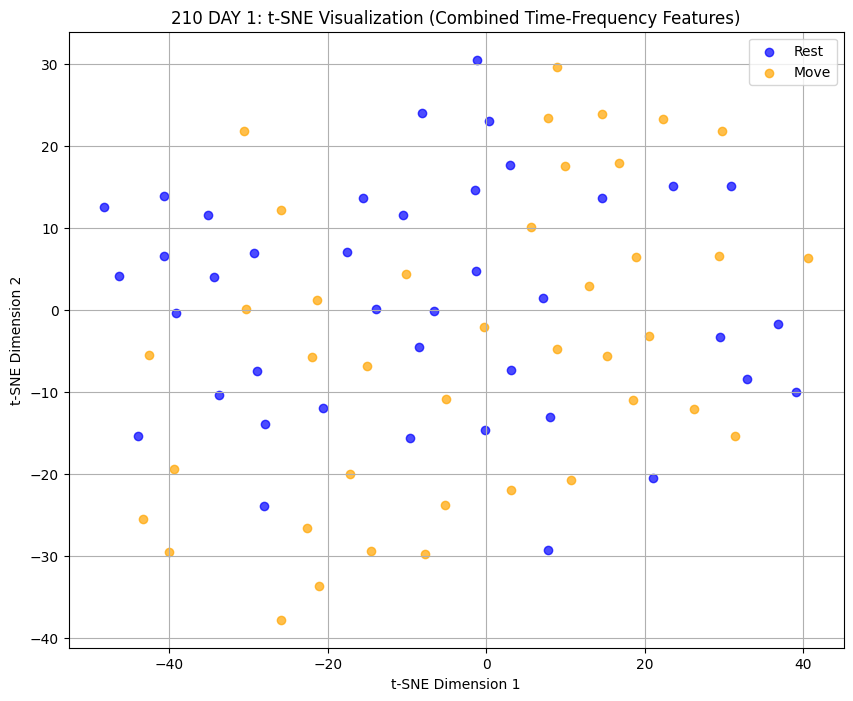

In [ ]:
mat_folder = '/content/mat_210_010'
all_rest_features, all_move_features = process_eeg_data(
    mat_folder, rest_starts, move_starts, rest_ends, move_ends, lowcut, highcut, amp_limit, function_name[0]
)
perform_tsne_and_plot(all_rest_features, all_move_features, '210 DAY 1', function_name[0])

all_rest_features, all_move_features = process_eeg_data(
    mat_folder, rest_starts, move_starts, rest_ends, move_ends, lowcut, highcut, amp_limit, function_name[1]
)
perform_tsne_and_plot(all_rest_features, all_move_features, '210 DAY 1', function_name[1])

Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


<ipython-input-123-a5b91d96baf1>:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_sample = int(start_event['pos'][0][0] * sampling_rate)
<ipython-input-123-a5b91d96baf1>:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)
<ipython-input-123-a5b91d96baf1>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)


Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


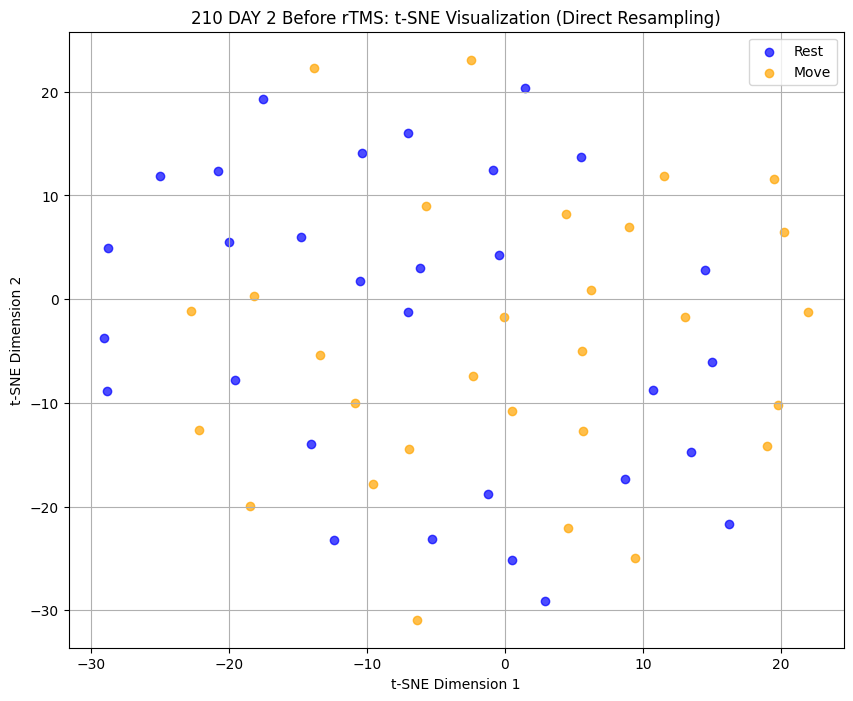

Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


<ipython-input-123-a5b91d96baf1>:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_sample = int(start_event['pos'][0][0] * sampling_rate)
<ipython-input-123-a5b91d96baf1>:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)
<ipython-input-123-a5b91d96baf1>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)


Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


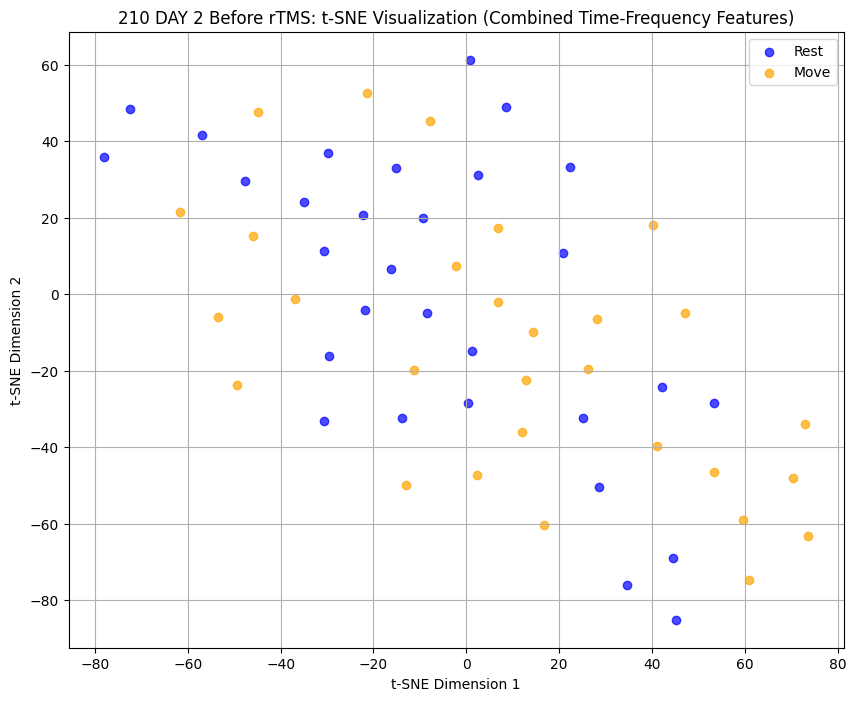

In [ ]:
mat_folder = '/content/mat_210_021'
all_rest_features, all_move_features = process_eeg_data(
    mat_folder, rest_starts, move_starts, rest_ends, move_ends, lowcut, highcut, amp_limit, function_name[0]
)
perform_tsne_and_plot(all_rest_features, all_move_features, '210 DAY 2 Before rTMS', function_name[0])

all_rest_features, all_move_features = process_eeg_data(
    mat_folder, rest_starts, move_starts, rest_ends, move_ends, lowcut, highcut, amp_limit, function_name[1]
)
perform_tsne_and_plot(all_rest_features, all_move_features, '210 DAY 2 Before rTMS', function_name[1])

Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


<ipython-input-123-a5b91d96baf1>:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_sample = int(start_event['pos'][0][0] * sampling_rate)
<ipython-input-123-a5b91d96baf1>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)
<ipython-input-123-a5b91d96baf1>:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)


Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


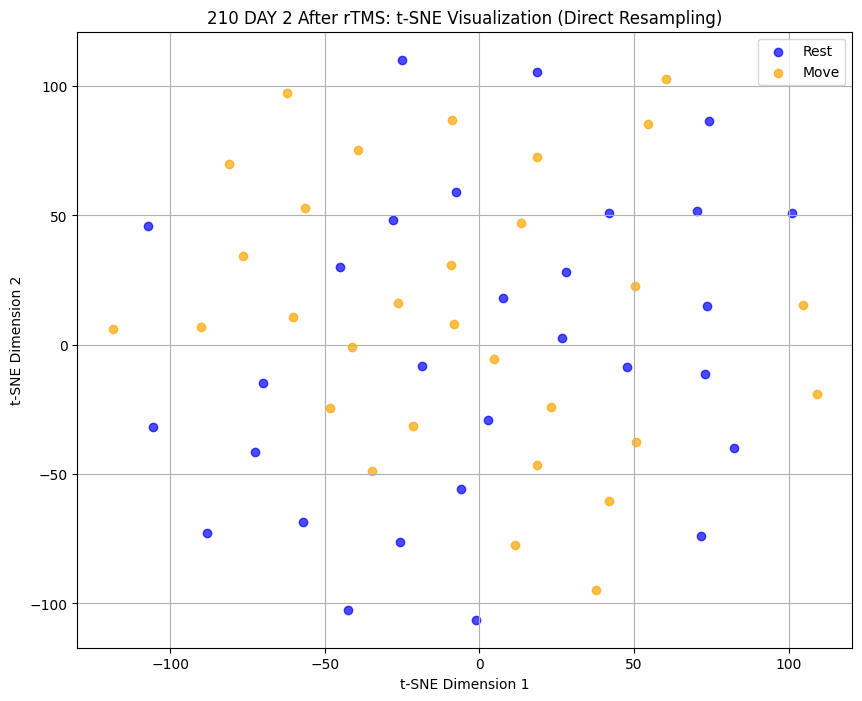

Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


<ipython-input-123-a5b91d96baf1>:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_sample = int(start_event['pos'][0][0] * sampling_rate)
<ipython-input-123-a5b91d96baf1>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)
<ipython-input-123-a5b91d96baf1>:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)


Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


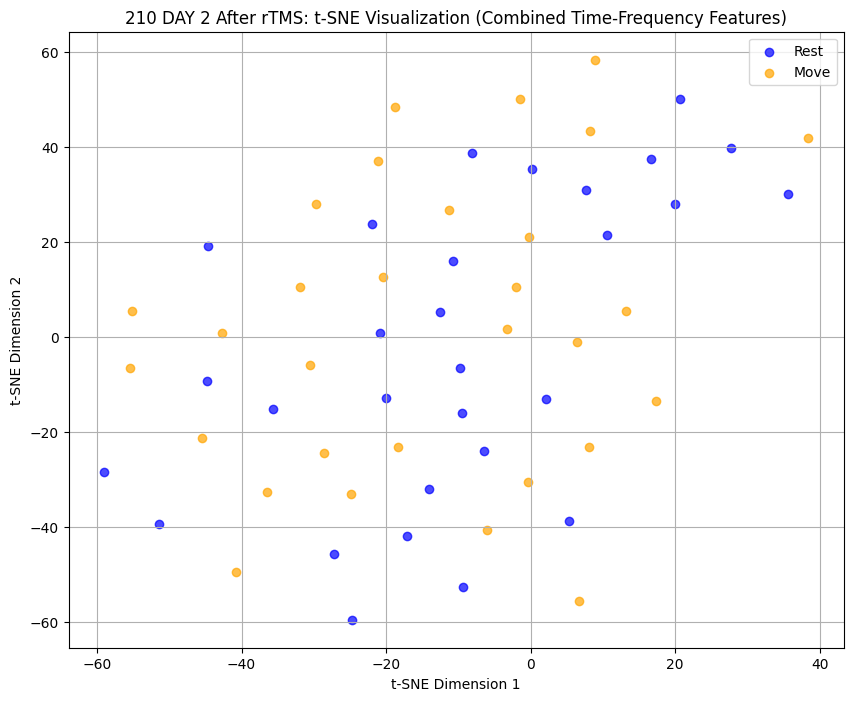

In [ ]:
mat_folder = '/content/mat_210_022'
all_rest_features, all_move_features = process_eeg_data(
    mat_folder, rest_starts, move_starts, rest_ends, move_ends, lowcut, highcut, amp_limit, function_name[0]
)
perform_tsne_and_plot(all_rest_features, all_move_features, '210 DAY 2 After rTMS', function_name[0])

all_rest_features, all_move_features = process_eeg_data(
    mat_folder, rest_starts, move_starts, rest_ends, move_ends, lowcut, highcut, amp_limit, function_name[1]
)
perform_tsne_and_plot(all_rest_features, all_move_features, '210 DAY 2 After rTMS', function_name[1])

## t-SNE -- 204

Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


<ipython-input-123-a5b91d96baf1>:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_sample = int(start_event['pos'][0][0] * sampling_rate)
<ipython-input-123-a5b91d96baf1>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)
<ipython-input-123-a5b91d96baf1>:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)


Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


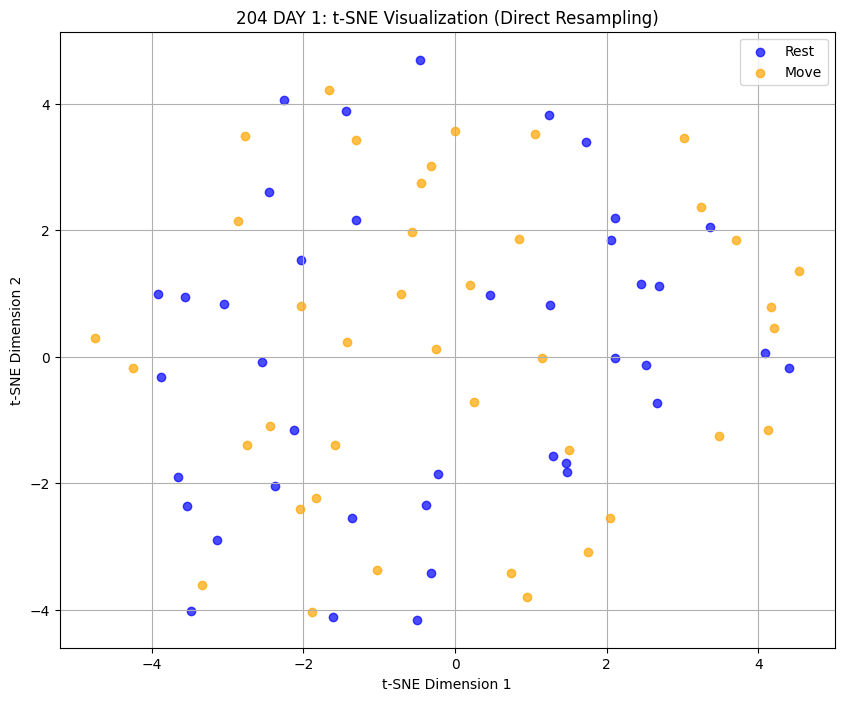

Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


<ipython-input-123-a5b91d96baf1>:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_sample = int(start_event['pos'][0][0] * sampling_rate)
<ipython-input-123-a5b91d96baf1>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)
<ipython-input-123-a5b91d96baf1>:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)


Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


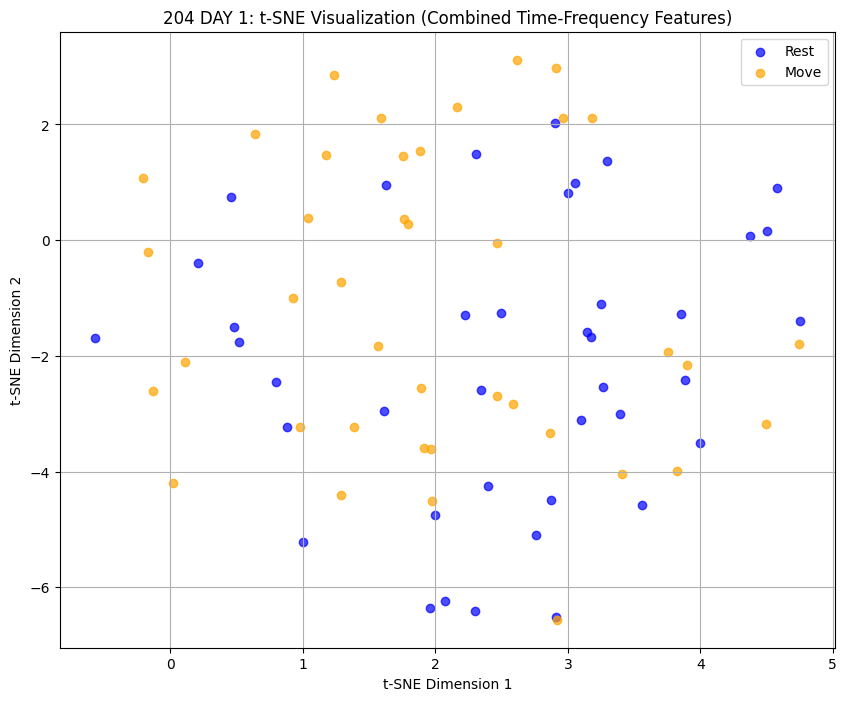

In [ ]:
mat_folder = '/content/mat_204_010'
all_rest_features, all_move_features = process_eeg_data(
    mat_folder, rest_starts, move_starts, rest_ends, move_ends, lowcut, highcut, amp_limit, function_name[0]
)
perform_tsne_and_plot(all_rest_features, all_move_features, '204 DAY 1', function_name[0])

all_rest_features, all_move_features = process_eeg_data(
    mat_folder, rest_starts, move_starts, rest_ends, move_ends, lowcut, highcut, amp_limit, function_name[1]
)
perform_tsne_and_plot(all_rest_features, all_move_features, '204 DAY 1', function_name[1])

Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


<ipython-input-123-a5b91d96baf1>:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_sample = int(start_event['pos'][0][0] * sampling_rate)
<ipython-input-123-a5b91d96baf1>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)
<ipython-input-123-a5b91d96baf1>:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)


Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


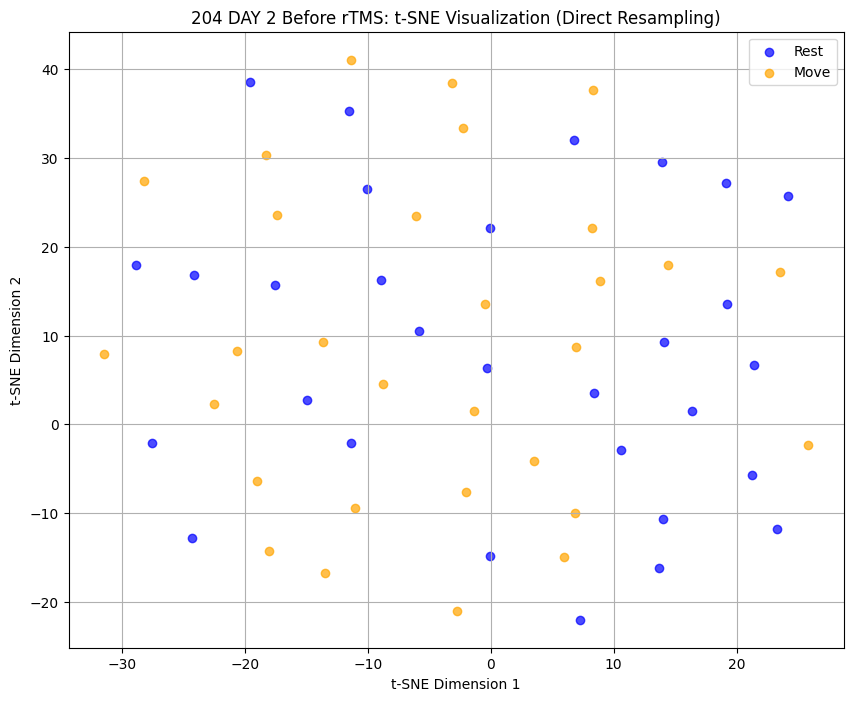

Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


<ipython-input-123-a5b91d96baf1>:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_sample = int(start_event['pos'][0][0] * sampling_rate)
<ipython-input-123-a5b91d96baf1>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)
<ipython-input-123-a5b91d96baf1>:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)


Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


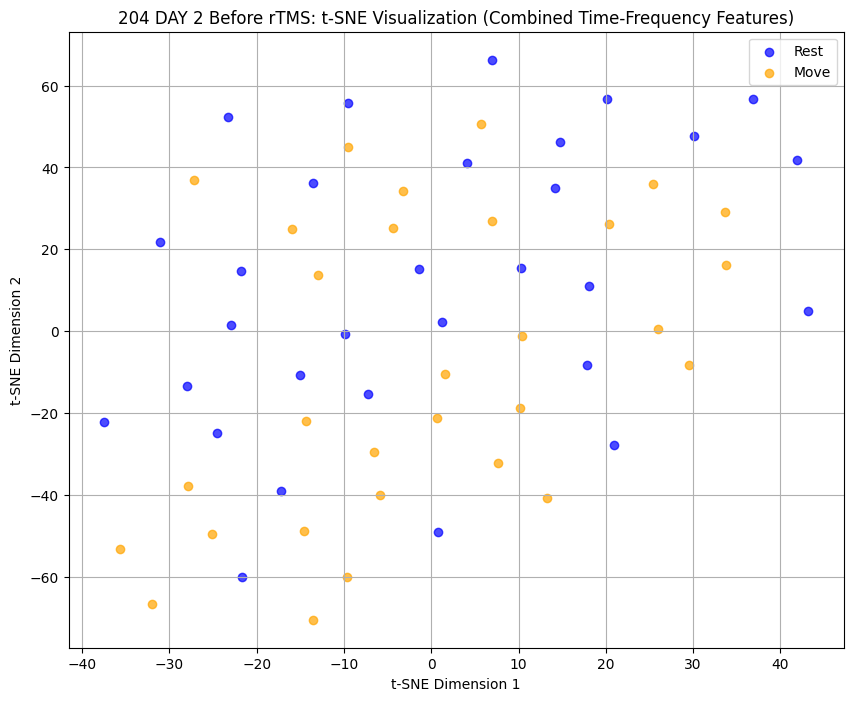

In [ ]:
mat_folder = '/content/mat_204_021'
all_rest_features, all_move_features = process_eeg_data(
    mat_folder, rest_starts, move_starts, rest_ends, move_ends, lowcut, highcut, amp_limit, function_name[0]
)
perform_tsne_and_plot(all_rest_features, all_move_features, '204 DAY 2 Before rTMS', function_name[0])

all_rest_features, all_move_features = process_eeg_data(
    mat_folder, rest_starts, move_starts, rest_ends, move_ends, lowcut, highcut, amp_limit, function_name[1]
)
perform_tsne_and_plot(all_rest_features, all_move_features, '204 DAY 2 Before rTMS', function_name[1])

Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


<ipython-input-123-a5b91d96baf1>:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_sample = int(start_event['pos'][0][0] * sampling_rate)
<ipython-input-123-a5b91d96baf1>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)
<ipython-input-123-a5b91d96baf1>:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)


Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


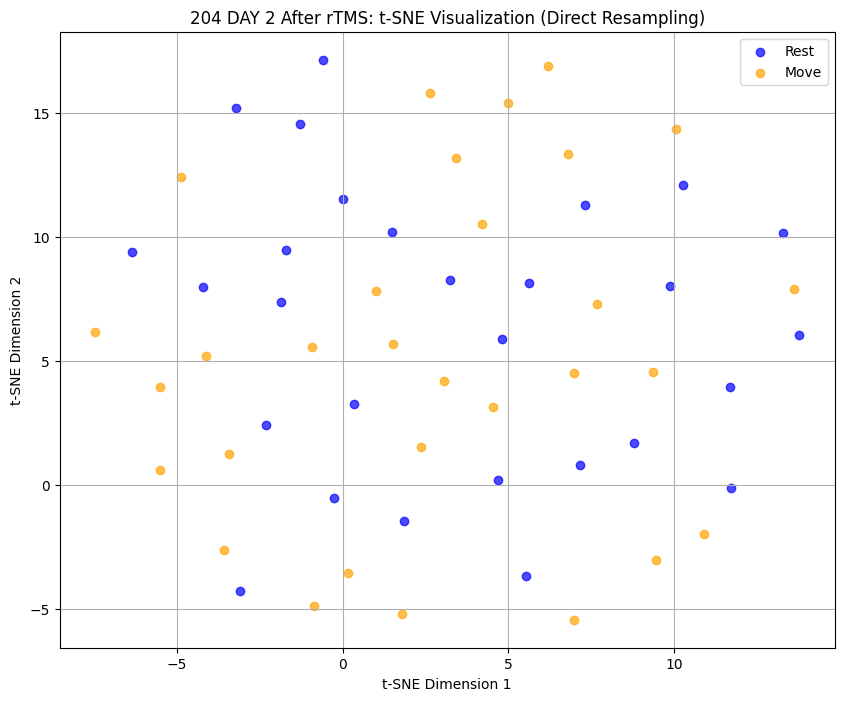

Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


<ipython-input-123-a5b91d96baf1>:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_sample = int(start_event['pos'][0][0] * sampling_rate)
<ipython-input-123-a5b91d96baf1>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)
<ipython-input-123-a5b91d96baf1>:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)


Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


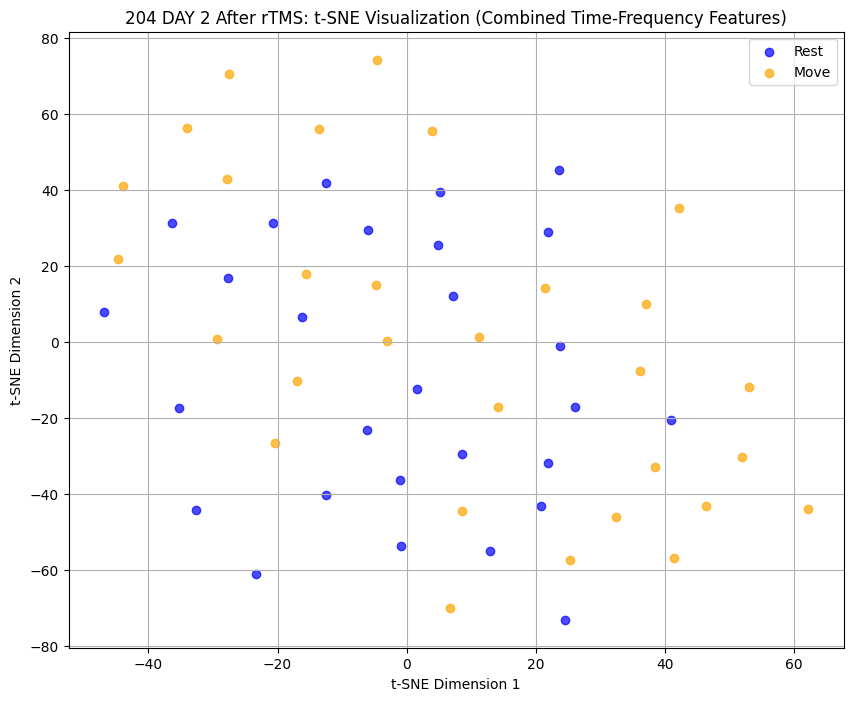

In [ ]:
mat_folder = '/content/mat_204_022'
all_rest_features, all_move_features = process_eeg_data(
    mat_folder, rest_starts, move_starts, rest_ends, move_ends, lowcut, highcut, amp_limit, function_name[0]
)
perform_tsne_and_plot(all_rest_features, all_move_features, '204 DAY 2 After rTMS', function_name[0])

all_rest_features, all_move_features = process_eeg_data(
    mat_folder, rest_starts, move_starts, rest_ends, move_ends, lowcut, highcut, amp_limit, function_name[1]
)
perform_tsne_and_plot(all_rest_features, all_move_features, '204 DAY 2 After rTMS', function_name[1])